# Gold Feature Engineering
In this notebook we take the gold data and create several new features for each date that include the evolution of closing price during the previous year

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data has been obtained from the following URL: https://finance.yahoo.com/quote/GC%3DF/history?period1=1451606400&period2=1632614400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [4]:
#we are loading the data from 01/01/2015 to 26/09/2021
gold_hist = pd.read_csv('./data_orig/Gold.csv', sep=';')

In [5]:
#There are some missing values
#After investigating, we realize that all dates with missing values (even just volume) shouldn't be here
#so the first step will be to eliminate them

gold_hist[gold_hist.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
10,"Sep 10, 2021",1789.6,1789.6,1789.6,1789.6,1789.6,NaN
188,"Dec 24, 2020",NaN,NaN,NaN,NaN,NaN,NaN
207,"Nov 27, 2020",NaN,NaN,NaN,NaN,NaN,NaN
441,"Dec 24, 2019",NaN,NaN,NaN,NaN,NaN,NaN
458,"Nov 29, 2019",NaN,NaN,NaN,NaN,NaN,NaN
562,"Jul 03, 2019",NaN,NaN,NaN,NaN,NaN,NaN
588,"May 28, 2019",1276.5,1276.5,1276.5,1276.5,1276.5,NaN
590,"May 23, 2019",1284.8,1284.8,1284.8,1284.8,1284.8,NaN
591,"May 22, 2019",1273.6,1273.6,1273.6,1273.6,1273.6,NaN
592,"May 21, 2019",1272.0,1272.0,1272.0,1272.0,1272.0,NaN


In [4]:
gold_hist.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 24, 2021",1749.70,1749.70,1745.00,1749.70,1749.70,31
1,"Sep 23, 2021",1766.80,1766.80,1738.20,1747.70,1747.70,31
2,"Sep 22, 2021",1776.70,1784.30,1767.00,1776.70,1776.70,17
3,"Sep 21, 2021",1762.20,1776.00,1759.00,1776.00,1776.00,106
4,"Sep 20, 2021",1751.80,1761.80,1750.90,1761.80,1761.80,185
5,"Sep 17, 2021",1758.80,1763.00,1749.40,1749.40,1749.40,581
6,"Sep 16, 2021",1792.90,1792.90,1743.90,1754.60,1754.60,1645
7,"Sep 15, 2021",1803.70,1803.70,1792.40,1792.40,1792.40,59
8,"Sep 14, 2021",1791.40,1806.20,1783.00,1804.70,1804.70,764
9,"Sep 13, 2021",1789.80,1796.00,1784.00,1792.00,1792.00,533


In [19]:
#we create a copy of the data so as not to change the original
gold_hist_m=gold_hist.copy()

In [20]:
#we eliminate any rows with missing values, as explained above
gold_hist_m.shape

(1695, 7)

In [21]:
gold_hist_m=gold_hist_m.dropna()
gold_hist_m.shape

(1654, 7)

In [22]:
#We change the column Date into a date format
gold_hist_m['Date']=pd.to_datetime(arg=gold_hist_m['Date'])
#and Close to a numeric format
gold_hist_m['Close']=pd.to_numeric(gold_hist_m['Close'], errors='coerce')
gold_hist_m

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-24,1749.7,1749.7,1745.0,1749.7,1749.7,31
1,2021-09-23,1766.8,1766.8,1738.2,1747.7,1747.7,31
2,2021-09-22,1776.7,1784.3,1767.0,1776.7,1776.7,17
3,2021-09-21,1762.2,1776.0,1759.0,1776.0,1776.0,106
4,2021-09-20,1751.8,1761.8,1750.9,1761.8,1761.8,185
...,...,...,...,...,...,...,...
1690,2015-01-08,1207.0,1215.7,1206.3,1208.4,1208.4,92
1691,2015-01-07,1219.2,1219.2,1210.6,1210.6,1210.6,29
1692,2015-01-06,1203.5,1220.0,1203.5,1219.3,1219.3,97
1693,2015-01-05,1180.3,1206.9,1180.1,1203.9,1203.9,470


In [23]:
#Erasing unnecesary columns
gold_hist_m = gold_hist_m.drop(labels=['Open','High','Low','Adj Close','Volume'], axis=1)

In [24]:
#We reorder the data because we need it to be from oldest to newest and now it's turned upside-down
gold_hist_m=gold_hist_m.reindex(index=gold_hist_m.index[::-1])
gold_hist_m.reset_index(inplace=True, drop=True)

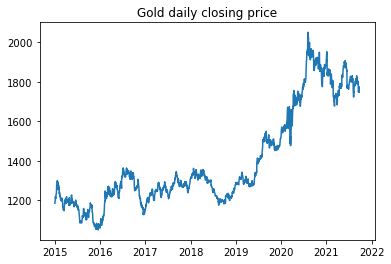

In [25]:
#Let's take a look at the data
plt.plot(gold_hist_m['Date'], gold_hist_m['Close'])
plt.title("Gold daily closing price")
plt.show()

In [26]:
#Here, we are adding columns with variations from previous day, week and month
gold_hist_m['C_dia_ant'] = gold_hist_m['Close'].shift(1)
gold_hist_m['C_dia_ant'].loc[[0]]=gold_hist_m['C_dia_ant'][1]

gold_hist_m['var_dia_ant']=gold_hist_m['Close']/gold_hist_m['C_dia_ant']-1


gold_hist_m['C_sem_ant'] = gold_hist_m['Close'].shift(5)

for i in range(0,5):
    gold_hist_m['C_sem_ant'].loc[[i]]=gold_hist_m['C_sem_ant'][i+5]

gold_hist_m['var_sem_ant']=gold_hist_m['Close']/gold_hist_m['C_sem_ant']-1


gold_hist_m['C_mes_ant'] = gold_hist_m['Close'].shift(20)

for i in range(0,20):
    gold_hist_m['C_mes_ant'].loc[[i]]=gold_hist_m['C_mes_ant'][i+20]

gold_hist_m['var_mes_ant']=gold_hist_m['Close']/gold_hist_m['C_mes_ant']-1

/home/dsc/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [27]:
#We create the real dataset for classification algorithms. It will contain:
#day-to-day price variation of the last 30 days
#day-to-day volume variation of the last 30 days
#week-to-week price variation from 4 weeks before to 12 weeks before
#month-to-month price variation from 3 months before to 11 months before
#all this data starting 2015/12/29
#2015/12/29 is a date chosen to make sure we have data before 2016/1/1 and use it as data for 2016/1/1
#in order to be able to merge bitcoin and gold data


columnasData=['varP0', 'varP1', 'varP2', 'varP3', 'varP4', 'varP5', 'varP6', 'varP7', 'varP8', 'varP9',
             'varP10', 'varP11', 'varP12', 'varP13', 'varP14', 'varP15', 'varP16', 'varP17', 'varP18', 'varP19',
             'varPs20', 'varPs25', 'varPs30', 'varPs35', 'varPs40', 'varPs45', 'varPs50', 'varPs55', 'varPs60',
             'varPm65', 'varPm85', 'varPm105', 'varPm125', 'varPm145', 'varPm165', 'varPm185', 'varPm205',
             'varPm225']
data_for_use = pd.DataFrame(columns=columnasData)


for i in range(0,gold_hist_m.shape[0]-1):
    if gold_hist_m['Date'][i]>pd.to_datetime(arg='2015-12-28',format='%Y-%m-%d'):
        #We fill the dates with no gold data with the data from the previous day with data
        if gold_hist_m['Date'][i]>pd.to_datetime(arg='2015-12-31',format='%Y-%m-%d') and \
            (gold_hist_m['Date'].loc[[i]].reset_index(drop=True)-pd.Timedelta(days=1) > \
            gold_hist_m['Date'].loc[[i-1]].reset_index(drop=True)).all():
            
            j=1
            while (gold_hist_m['Date'].loc[[i]].reset_index(drop=True)-pd.Timedelta(days=j) \
                > gold_hist_m['Date'].loc[[i-1]].reset_index(drop=True)).all():
                
                dtemp = dtemp.set_index(keys=[gold_hist_m['Date'].loc[[i-1]]+pd.Timedelta(days=j)])
                data_for_use = data_for_use.append(dtemp)
                j=j+1
        
        
        dtemp = pd.concat([pd.DataFrame(gold_hist_m['var_dia_ant'][i-19:i+1][::-1].values),
                            pd.DataFrame(gold_hist_m['var_sem_ant'][i-64:i-19][::-5].values),
                            pd.DataFrame(gold_hist_m['var_mes_ant'][i-244:i-64][::-20].values)],
                          ignore_index=True, axis=0).T

        dtemp = dtemp.set_index(keys=[gold_hist_m['Date'].loc[[i]]])
        
        new_cols = {x: y for x, y in zip(dtemp.columns, data_for_use.columns)}

        dtemp = dtemp.rename(columns=new_cols)

        data_for_use = data_for_use.append(dtemp)

In [28]:
data_for_use.head(20)

,varP0,varP1,varP2,varP3,varP4,varP5,varP6,varP7,varP8,varP9,...,varPs60,varPm65,varPm85,varPm105,varPm125,varPm145,varPm165,varPm185,varPm205,varPm225
2015-12-29,0.006539,-0.006220,0.007294,-0.005024,-0.006563,0.014725,0.014656,-0.025232,0.014206,-0.001691,...,-0.007766,0.021026,0.031239,-0.068948,-0.013252,-0.007124,-0.014373,0.037894,-0.054705,0.021102
2015-12-30,-0.016148,0.006539,-0.006220,0.007294,-0.005024,-0.006563,0.014725,0.014656,-0.025232,0.014206,...,0.005389,-0.000971,0.034889,-0.058555,-0.010129,-0.012938,-0.010639,0.037066,-0.065039,0.020395
2015-12-31,0.000189,-0.016148,0.006539,-0.006220,0.007294,-0.005024,-0.006563,0.014725,0.014656,-0.025232,...,0.017478,-0.003977,0.038737,-0.071191,0.004367,-0.012348,-0.009383,0.037282,-0.065687,-0.000892
2016-01-01,0.000189,-0.016148,0.006539,-0.006220,0.007294,-0.005024,-0.006563,0.014725,0.014656,-0.025232,...,0.017478,-0.003977,0.038737,-0.071191,0.004367,-0.012348,-0.009383,0.037282,-0.065687,-0.000892
2016-01-02,0.000189,-0.016148,0.006539,-0.006220,0.007294,-0.005024,-0.006563,0.014725,0.014656,-0.025232,...,0.017478,-0.003977,0.038737,-0.071191,0.004367,-0.012348,-0.009383,0.037282,-0.065687,-0.000892
2016-01-03,0.000189,-0.016148,0.006539,-0.006220,0.007294,-0.005024,-0.006563,0.014725,0.014656,-0.025232,...,0.017478,-0.003977,0.038737,-0.071191,0.004367,-0.012348,-0.009383,0.037282,-0.065687,-0.000892
2016-01-04,0.013958,0.000189,-0.016148,0.006539,-0.006220,0.007294,-0.005024,-0.006563,0.014725,0.014656,...,0.030031,-0.020374,0.044008,-0.053540,-0.017729,-0.013371,-0.012867,0.045569,-0.054881,-0.012396
2016-01-05,0.003069,0.013958,0.000189,-0.016148,0.006539,-0.006220,0.007294,-0.005024,-0.006563,0.014725,...,0.027374,-0.016159,0.043106,-0.066707,-0.011892,-0.004986,-0.013424,0.040517,-0.055323,-0.011585
2016-01-06,0.012519,0.003069,0.013958,0.000189,-0.016148,0.006539,-0.006220,0.007294,-0.005024,-0.006563,...,0.016885,0.011925,0.030728,-0.059362,-0.022848,-0.005450,-0.000168,0.034250,-0.059682,-0.030205
2016-01-07,0.014470,0.012519,0.003069,0.013958,0.000189,-0.016148,0.006539,-0.006220,0.007294,-0.005024,...,0.023548,0.015617,0.024221,-0.054937,-0.018815,-0.031599,0.014066,0.046329,-0.049499,-0.053880


In [29]:
# We store the engineered data in a new file
data_for_use.to_csv('./data_proc/gold_data_for_use.csv')